In [1]:

import sys
dir_str = ".."
if (dir_str not in sys.path):
    sys.path.append(dir_str)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import mean_squared_error, train_test_split
from supervised_learning import BayesianRegression

In [2]:
data = pd.read_csv('../data/TempLinkoping2016.txt', sep="\t")
time = data["time"].values
temp = data["temp"].values
X = np.array(time).reshape(-1, 1)
y = np.array(temp).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
n_samples, n_features = X.shape

MSE:  106.77199072543245


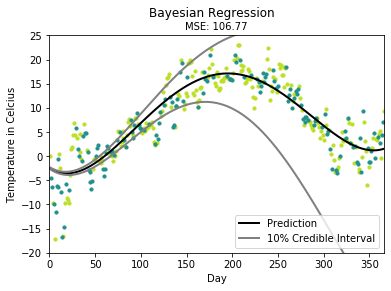

In [6]:
mu0 = np.array([0]*n_features)
omega0 = np.diag([1e-4]*n_features)
#Scaled inverse chi-squared
nu0 = 1
sigma_sq0 = 100

#The credible interval
cred_int = 10

reg = BayesianRegression(
        n_draws=2000,
        poly_degree=4,
        mu0=mu0,
        omega0=omega0,
        nu0=nu0,
        sigma_sq0=sigma_sq0,
        cred_int=cred_int
)

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
#Get prediction line
y_pred_, y_lower_, y_upper_ = reg.predict(X_test=X, eti=True)
print("MSE: ", mse)

cmap = plt.get_cmap('viridis')
#plot the results
m1 = plt.scatter(366 * X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(366 * X_test, y_test, color=cmap(0.5), s=10)
p1 = plt.plot(366*X, y_pred_, color="black", linewidth=2, label="Prediction")
p2 = plt.plot(366*X, y_lower_, color="gray", linewidth=2, label="{0}% Credible Interval".format(cred_int))
p3 = plt.plot(366*X, y_upper_, color="gray", linewidth=2)
plt.axis((0, 366, -20, 25))
plt.suptitle("Bayesian Regression")
plt.title("MSE: %.2f" % mse, fontsize=10)
plt.xlabel('Day')
plt.ylabel('Temperature in Celcius')
plt.legend(loc="lower right")
plt.show()